c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmengine\optim\optimizer\zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \



image 1/1 e:\Programowanie\mmpose-testing\InputsJPGs\humanadnanimal.jpg: 640x448 1 person, 126.6ms
Speed: 6.9ms preprocess, 126.6ms inference, 8.5ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 e:\Programowanie\mmpose-testing\InputsJPGs\humanadnanimal.jpg: 640x448 1 person, 45.6ms
Speed: 3.0ms preprocess, 45.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 e:\Programowanie\mmpose-testing\InputsJPGs\humanadnanimal.jpg: 640x448 1 person, 42.3ms
Speed: 1.0ms preprocess, 42.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 e:\Programowanie\mmpose-testing\InputsJPGs\humanadnanimal.jpg: 640x448 1 person, 41.4ms
Speed: 1.5ms preprocess, 41.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 e:\Programowanie\mmpose-testing\InputsJPGs\humanadnanimal.jpg: 640x448 1 person, 43.6ms
Speed: 1.0ms preprocess, 43.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 e:\Prog

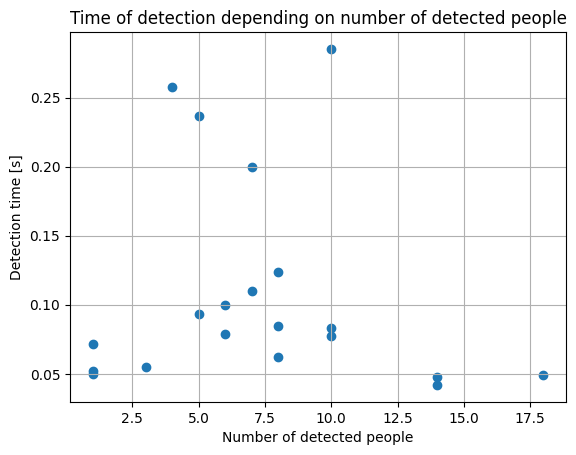

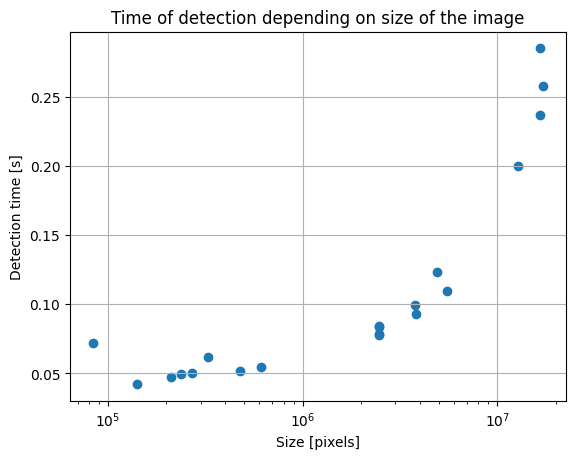

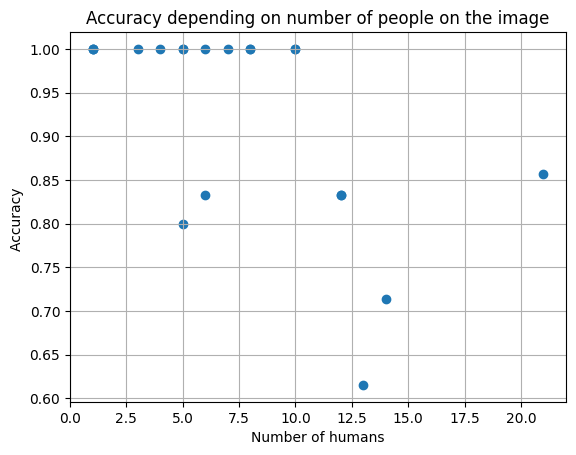

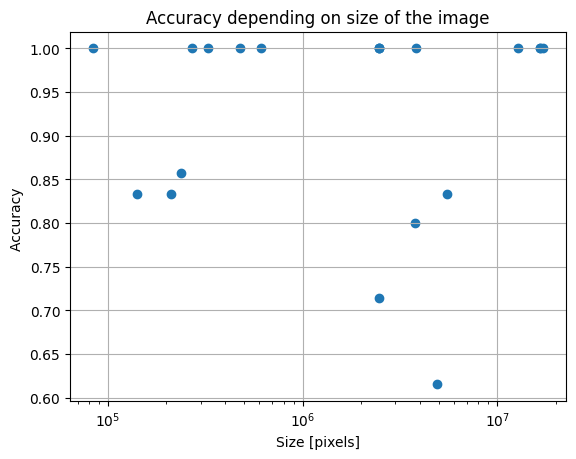

In [1]:
from ultralytics import YOLO
import time
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

time_res = []


def get_image_size(img_path):
    with Image.open(img_path) as img:
        width, height = img.size
    return width, height


  
def test_mmposeinter_human(img_path,num_of_h,inferencer,iterations=10):
# instantiate the inferencer using the model alias

  times = []
  num_detected_list = []   

# The MMPoseInferencer API employs a lazy inference approach,
# creating a prediction generator when given input
  for _ in range(iterations):
      start = time.perf_counter()
      results = inferencer(img_path)
    #   result_generator = inferencer(img_path, show=False,vis_out_dir='./Results')  # turn off showing the result for speed
    #   result = next(result_generator)
      stop = time.perf_counter()
      for result in results:
            # result.show()
            result.save(filename=f"./ResultsYOLO/{Path(img_path).name}")
            boxes = result.boxes
            keypoints = result.keypoints
            
            
      detection_time = stop - start
      times.append(detection_time)
      num_detected = keypoints.shape[0]
      num_detected_list.append(num_detected)
  
  avg_time = sum(times) / iterations
  avg_detected = sum(num_detected_list) / iterations
  print(f"Image name: {Path(img_path).name}")
  print(f"Number of humans on the image:{num_of_h}")
  print(f"Number of humans detected:{avg_detected}")
  print(f"Detection time:{avg_time} seconds")
  # nb = len(result['predictions'][0])
  return avg_time, avg_detected

size = []  
lst_err = []
nb_h_l = []
l_of_p = []
# inferencer = MMPoseInferencer('human')
inferencer = YOLO("yolo11n-pose.pt")





img_path = './InputsJPGs/humanadnanimal.jpg'
nb_of_p = 1
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group.jpg'
nb_of_p = 21
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/one.jpg'
nb_of_p = 1
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/manwithoutlimbs.jpg'
nb_of_p = 1
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group2.jpg' 
nb_of_p = 8
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

# img_path = './InputsJPGs/animallikehuman.jpg'
# t, nb_det = test_mmposeinter_human(img_path,0,inferencer)
# time_res.append(t)
# nb_h_l.append(nb_det)


img_path = './InputsJPGs/group3.jpg'
nb_of_p = 12
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)


img_path = './InputsJPGs/group4.jpg'
nb_of_p = 12
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group5.jpg'
nb_of_p = 14
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group6.jpg'
nb_of_p = 8
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group7.jpg'
nb_of_p = 6
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group8.jpg'
nb_of_p = 10
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group9.jpg'
nb_of_p = 7
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group10.jpg'
nb_of_p = 5
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group11.jpg'
nb_of_p = 6
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group12.jpg'
nb_of_p = 13
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group13.jpg'
nb_of_p = 3
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group14.jpg'
nb_of_p = 5
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group15.jpg'
nb_of_p = 5
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group16.jpg'
nb_of_p = 10
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)

img_path = './InputsJPGs/group17.jpg'
nb_of_p = 4
l_of_p.append(nb_of_p)
t, nb_det = test_mmposeinter_human(img_path,nb_of_p,inferencer)
time_res.append(t)
nb_h_l.append(nb_det)
width, height = get_image_size(img_path)
size.append(width * height)
err = abs(nb_of_p - nb_det)/nb_of_p
lst_err.append(1 - err)


plt.scatter(nb_h_l,time_res)
plt.grid()
plt.title("Time of detection depending on number of detected people")
plt.xlabel('Number of detected people')
plt.ylabel('Detection time [s]')
plt.show()

plt.scatter(size,time_res)
plt.grid()
plt.title("Time of detection depending on size of the image")
plt.xlabel('Size [pixels]')
plt.ylabel('Detection time [s]')
plt.xscale('log')
plt.show()

plt.scatter(l_of_p,lst_err)
plt.grid()
plt.title("Accuracy depending on number of people on the image")
plt.xlabel('Number of humans')
plt.ylabel('Accuracy ')
plt.show()

plt.scatter(size,lst_err)
plt.grid()
plt.title("Accuracy depending on size of the image")
plt.xlabel('Size [pixels]')
plt.ylabel('Accuracy ')
plt.xscale('log')
plt.show()
